In [3]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
import warnings
warnings.filterwarnings('ignore')

/kaggle/input/Social_Network_Ads.csv


In [5]:
# Importing the dataset
dataset = pd.read_csv('/kaggle/input/Social_Network_Ads.csv')


In [6]:
dataset

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [7]:
X = dataset.iloc[:, [2, 3]].values
y = dataset.iloc[:, 4].values


In [8]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [9]:
# Fitting Decision Tree Classification to the Training set
from sklearn import tree
classifier = tree.DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

[Text(831.6346153846154, 1045.3846153846155, 'X[0] <= 0.631\nentropy = 0.951\nsamples = 300\nvalue = [189, 111]'),
 Text(439.96153846153845, 961.7538461538462, 'X[1] <= 0.606\nentropy = 0.693\nsamples = 215\nvalue = [175, 40]'),
 Text(193.15384615384613, 878.123076923077, 'X[0] <= -0.161\nentropy = 0.241\nsamples = 176\nvalue = [169, 7]'),
 Text(150.23076923076923, 794.4923076923078, 'entropy = 0.0\nsamples = 114\nvalue = [114, 0]'),
 Text(236.07692307692307, 794.4923076923078, 'X[1] <= -0.06\nentropy = 0.509\nsamples = 62\nvalue = [55, 7]'),
 Text(193.15384615384613, 710.8615384615384, 'entropy = 0.0\nsamples = 31\nvalue = [31, 0]'),
 Text(279.0, 710.8615384615384, 'X[1] <= 0.403\nentropy = 0.771\nsamples = 31\nvalue = [24, 7]'),
 Text(236.07692307692307, 627.2307692307693, 'X[1] <= 0.027\nentropy = 0.663\nsamples = 29\nvalue = [24, 5]'),
 Text(193.15384615384613, 543.6, 'entropy = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(279.0, 543.6, 'X[1] <= 0.259\nentropy = 0.592\nsamples = 28\nv

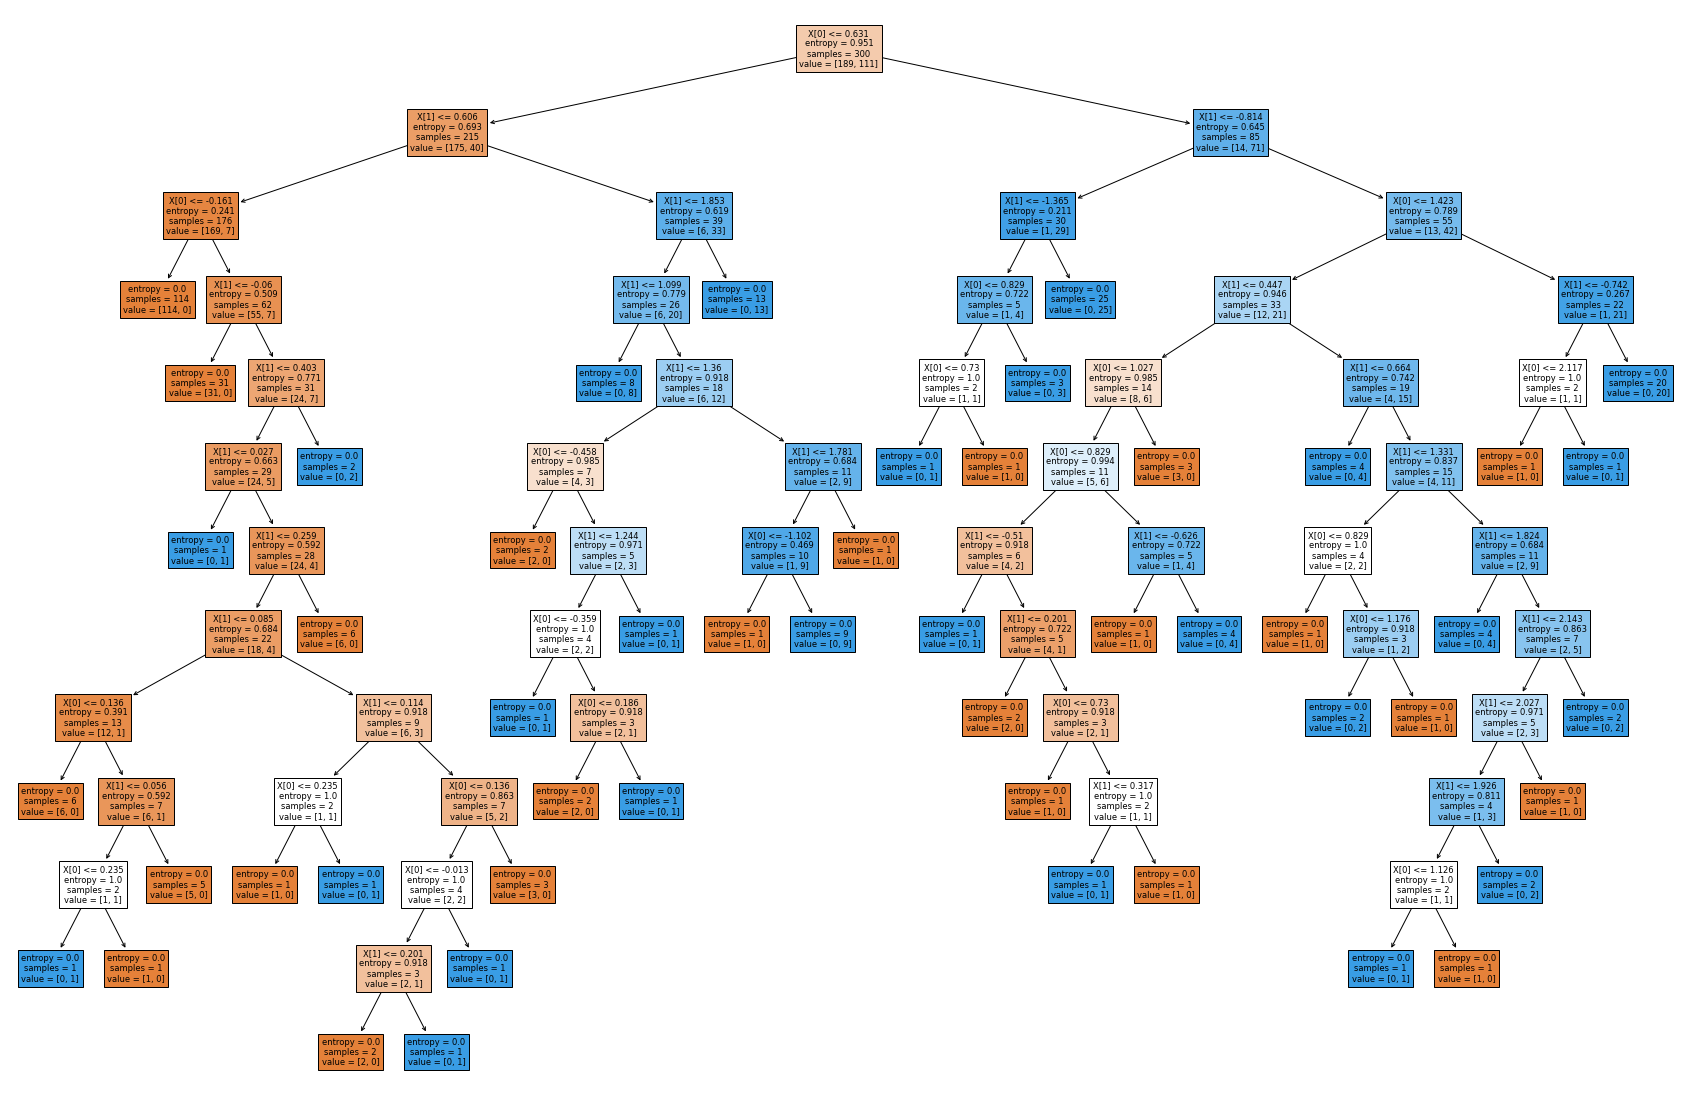

In [10]:
plt.figure(figsize=(30,20))
tree.plot_tree(classifier,filled=True)

In [11]:

# Predicting the Test set results
y_pred = classifier.predict(X_test)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

In [12]:
cm

array([[62,  6],
       [ 3, 29]])

In [13]:
correct_prediction = cm[0][0]+cm[1][1]
wrong_prediction = cm[0][1]+cm[1][0]
total = correct_prediction + wrong_prediction

In [14]:
accuracy = (correct_prediction/total)*100

In [15]:
accuracy

91.0

In [19]:
from sklearn.metrics import classification_report as cr

In [24]:
print(cr(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.91      0.93        68
           1       0.83      0.91      0.87        32

    accuracy                           0.91       100
   macro avg       0.89      0.91      0.90       100
weighted avg       0.91      0.91      0.91       100

